In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [15]:
# 函数功能：读取文件，将特征转成numpy矩阵,将label转成numpy向量

def file2matrix(file_name):
    fr = open(file_name)
    array_lines = fr.readlines()
    num_of_lines = len(array_lines)
    feature_matrix = np.zeros((num_of_lines, 3))  # 3列特征
    label_vector = []
    index = 0
    for line in array_lines:
        # 每行元素示例： '40920\t8.326976\t0.953952\tlargeDoses\n'
        line = line.strip()  # 移除字符串首尾的空格和换行符\n
        line = line.split('\t')
        feature_matrix[index] = line[:3]
        label_vector.append(line[3])
        index += 1
    return feature_matrix, label_vector

In [16]:
# 传入两个特征的向量，构成一些列的(x,y)坐标，查看点的分布情况
# scatter函数中的color参数，也是一个向量，一一对应前面每个点的颜色，s参数为点的大小，alpha为点的透明度，越小越透明
def data_visualization(x, y):
    plt.figure()
    label_colors = []
    for label in labels:
        if label == 'largeDoses':
            label_colors.append('red')
        if label == 'smallDoses':
            label_colors.append('yellow')
        if label == 'didntLike':
            label_colors.append('black')
    plt.scatter(x=x, y=y, color=label_colors, s=15, alpha=0.8)
    plt.show()


In [20]:
# 数值归一化方式很多
# 比如说 线性函数归一化(Min-Max Scaling) new_value=(old_value-min)/(max-min)
# 零均值归一化 (Z-Score Normalization)  new_value=(old_value-mean)/std_error 映射到均值为0、标准差为1的[-1,1]区间
# 这里采用Min-Max Scaling
def min_max_norm(featue_matrix):
    min = featue_matrix.min(0) #返回矩阵中每一列的最小值组成的数组
    max = featue_matrix.max(0)
    min_matrix = np.tile(min,(featue_matrix.shape[0],1)) # 按行复制最小值组成的向量，得到一个矩阵
    max_matrix = np.tile(max,(featue_matrix.shape[0],1))
    norm_matrix = (featue_matrix-min_matrix)/(max_matrix-min_matrix)
    return norm_matrix

In [21]:
# 与1_simple_knn代码中的knn一致
def knn(test, train, labels, k):
    num_train_samples = train.shape[0]
    test = np.tile(test, (num_train_samples, 1))  # np.tile 将test复制num_train_samples行,复制1列
    diff_set = train - test
    distance = np.sqrt((diff_set ** 2).sum(axis=1))  # sum(axis=1),表示每一行的所有列求和
    sorted_distance_indicies = np.argsort(distance)  # 返回数组,如[1, 0, 2, 3],表示下标为1的元素值最小,其次是0,以此类推
    class_count = {}  # 该字典用来存前k个元素的类别，以及出现的次数
    for i in range(k):
        label = labels[sorted_distance_indicies[i]]
        # dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值0
        class_count[label] = class_count.get(label, 0) + 1
    # 字典按照value值,降序排列
    # key=operator.itemgetter(1) 根据字典的值进行排序
    # key=operator.itemgetter(0) 根据字典的键进行排序
    # reverse 降序排序字典
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1),
                                reverse=True)  # 如[('爱情片', 2), ('动作片', 1)]
    return sorted_class_count[0][0]

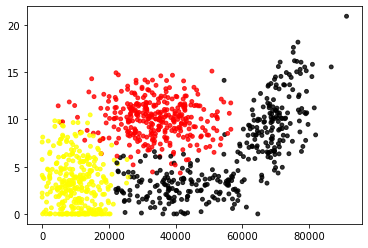

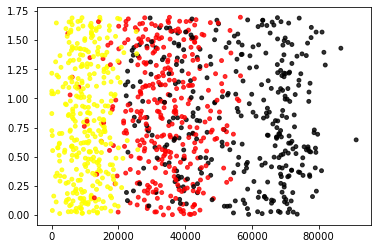

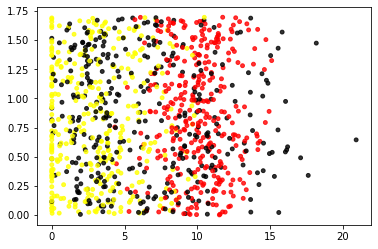

样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为smallDoses，样本真实标签为smallDoses
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为smallDoses，样本真实标签为smallDoses
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为smallDoses，样本真实标签为smallDoses
样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为smallDoses，样本真实标签为smallDoses
样本预测标签为didntLike，样本真实标签为didntLike
样本预测标签为largeDoses，样本真实标签为smallDoses
样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为smallDoses，样本真实标签为smallDoses
样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为smallDoses，样本真实标签为smallDoses
样本预测标签为largeDoses，样本真实标签为largeDoses
样本预测标签为smallDoses，

In [22]:
if __name__ == '__main__':
    # step 1 导入数据
    train, labels = file2matrix('datingTestSet.txt')
    # step 2 分析数据
    data_visualization(train[:, 0], train[:, 1])  # 特征0与特征1之间的散点图 图片显示，区分度最佳
    data_visualization(train[:, 0], train[:, 2])  # 特征0与特征2之间的散点图
    data_visualization(train[:, 1], train[:, 2])  # 特征1与特征2之间的散点图
    # step 3 特征归一化
    train = min_max_norm(train)
    # step 4 测试算法(一共1000条数据,前900个作为训练集，后100个作为测试集)
    error_count = 0
    for i in range(100):
        predict_label = knn(train[i], train[100:], labels[100:], k=5)
        print('样本预测标签为{}，样本真实标签为{}'.format(predict_label, labels[i]))
        if predict_label != labels[i]:
            error_count += 1
    print('错误率为', error_count / 100)